# Processing TESS sector 94 data for TOI4504

In [7]:
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
%matplotlib inline
# path = '../research/star_systems/TOI-4504/lightkurve/'
path = '../data/TOI-4504/'


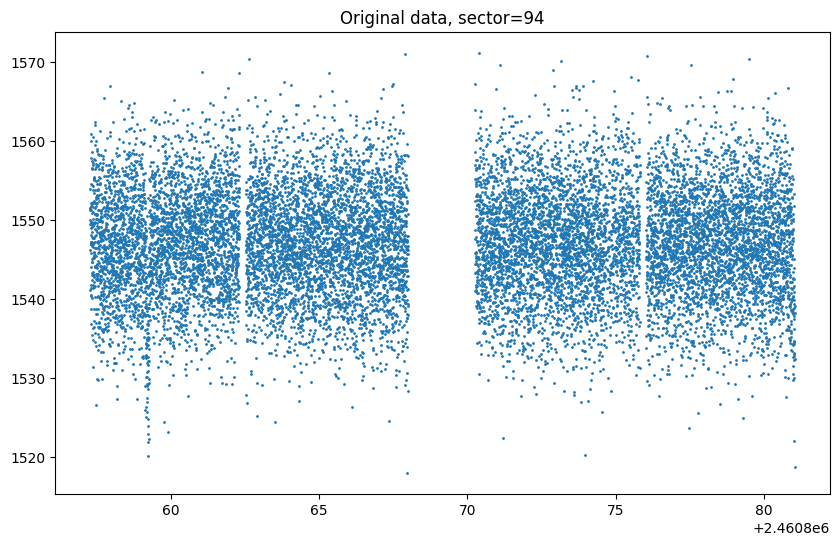

In [8]:
spoc_sectors = [94]
spoc_dfs = []
for sector in spoc_sectors:
    full_path = path + f"{sector}_SPOC_120.csv"
    df = csv2df(full_path)
    df = tesstime2bjd(df)
    spoc_dfs.append(df)
    plot_this(df.time, [df.flux], ["flux"], title=f"Original data, {sector=}")

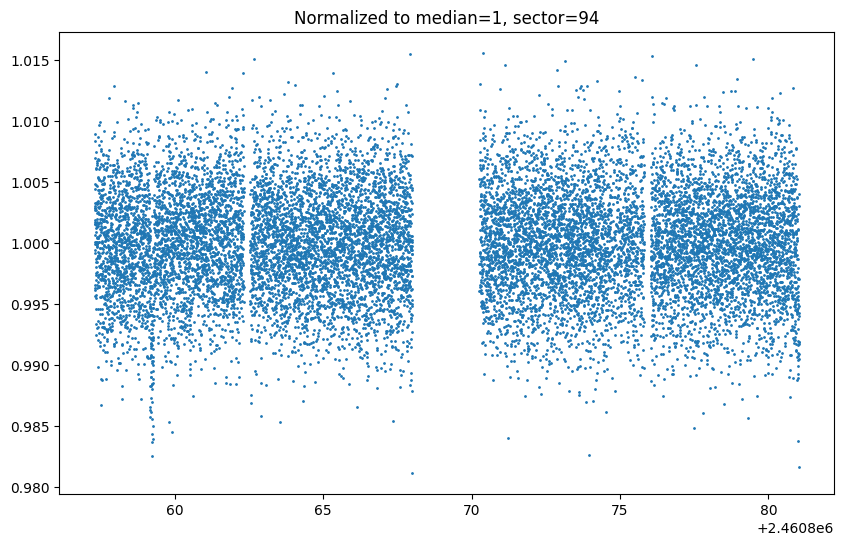

In [9]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    median = median_flux(df)
    df = scale_flux(df, 1/median)
    plot_this(df.time, [df.flux], ["flux"], title=f"Normalized to median=1, {sector=}")

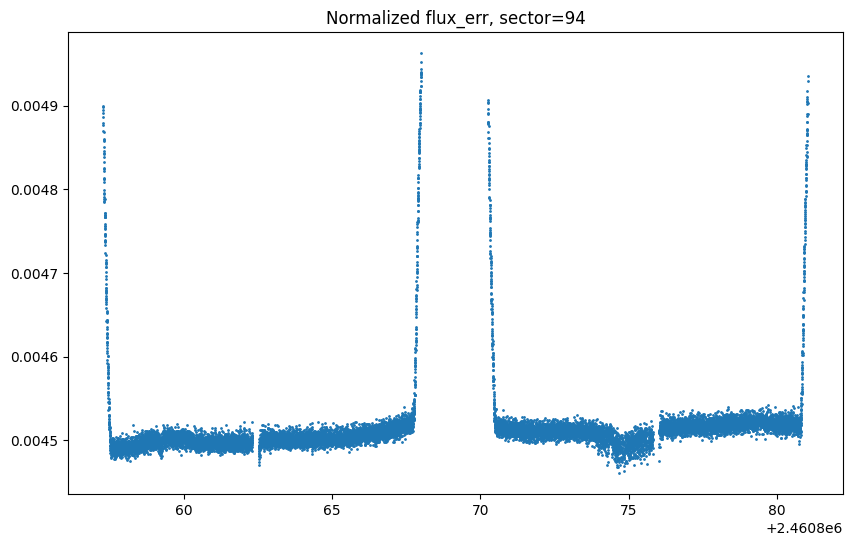

In [16]:
plot_this(df.time, [df.flux_err], ["flux_err"], title=f"Normalized flux_err, {sector=}")

In [10]:
for df, sector in zip(spoc_dfs, spoc_sectors):
    full_path = path + f"{sector}_SPOC_120_p.csv"
    df2csv(df, full_path)

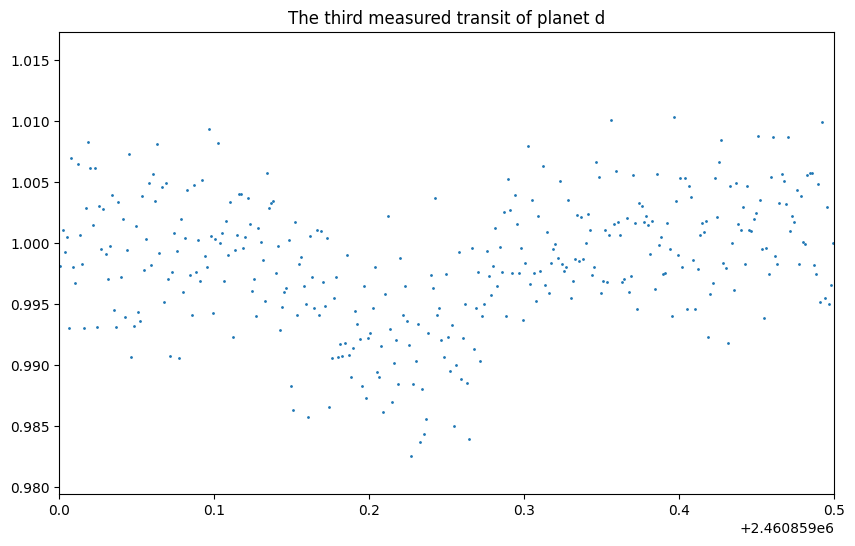

In [19]:
plot_this(df.time, [df.flux], ["flux"], left=2460859.0, right=2460859.5, title="The third measured transit of planet d")

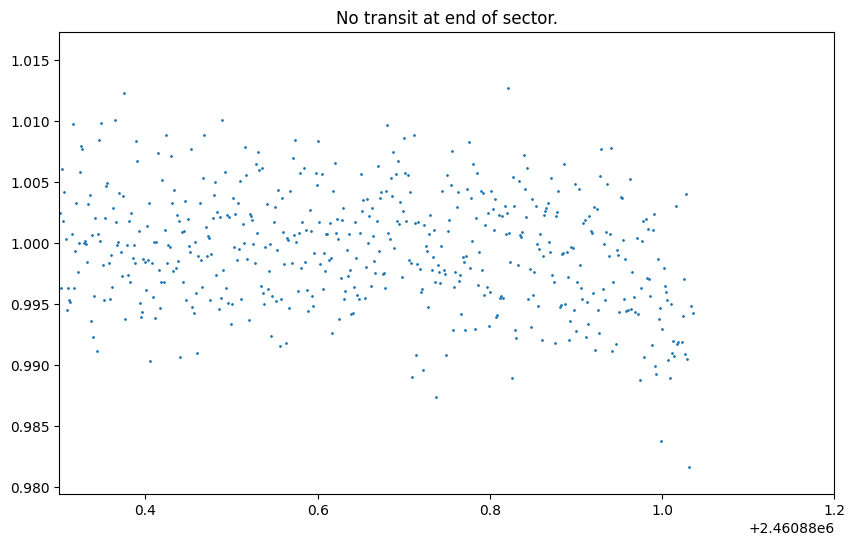

In [17]:
plot_this(df.time, [df.flux], ["flux"], left=2460880.3, right=2460881.2, title="No transit at end of sector.")